## Project Title: Support Vector Machine (SVM) from Scratch

### Project Overview:

The "Support Vector Machine (SVM) from Scratch" project demonstrates the implementation of a binary classification SVM from the ground up in Python. SVM is a powerful machine learning algorithm used for both classification and regression tasks. This project focuses on its application to binary classification.

### Implementation Details:

#### Custom SVM Class:

- A custom SVM class is created to encapsulate the SVM functionality. This class is designed for binary classification tasks.

#### Constructor:

- The SVM class is initialized with parameters such as learning rate, lambda (regularization parameter), and the number of iterations (epochs).

#### Training Data:

- The project imports synthetic training data using the datasets.make_blobs function from scikit-learn. This data consists of two classes and two features. Class labels are converted to -1 and 1 for SVM classification.

#### SVM Training:

- The fit method in the SVM class is responsible for training the model.
- The SVM model is trained using a gradient descent approach. It optimizes a decision boundary to separate the two classes.
- The core idea of SVM, maximizing the margin between classes, is implemented in this step.

#### Prediction:

- The prediction method in the SVM class allows for making predictions on new data points after the model is trained.

#### Visualization:

- To visualize the SVM's decision boundary and support vectors, the project includes a visualization function.
- This function plots the data points, the decision boundary, and margins.

### Code Overview:

- The custom SVM class is constructed with the ability to train and predict.
- A synthetic dataset is generated for training.
- The SVM is trained from scratch using a gradient descent approach.
- The visualization function demonstrates the effectiveness of the trained SVM by displaying the decision boundary, support vectors, and data points.

### Key Takeaways:

- Implementing a Support Vector Machine from scratch allows for a deeper understanding of the algorithm's inner workings.
- The project showcases how a gradient descent optimization method can be applied to train an SVM for binary classification.
- Visualizing the decision boundary and margins helps illustrate the SVM's ability to find an optimal separation between classes.


On the whole, this project is a valuable project of mine as it not only demonstrates my proficiency in machine learning but also my ability to construct essential algorithms from the ground up. It serves as a testament to a strong foundation in both theory and practical implementation of support vector machines.

### Importing the libraries

In [1]:
import numpy as np

## Creating The Architecture of SVM

In [2]:
class SVM: 
    def __init__(self, lr=0.001, n_iter=1000, lambda_param=0.001):
        self.lr = lr
        self.n_iter = n_iter
        self.lambda_param = lambda_param

        self.w = None
        self.b = None

    def fit(self, X, y):
        N, n_features = X.shape
        y = np.where(y<=0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iter):
            for idx, x_idx in enumerate(X):
                condition = y[idx] * (np.dot(x_idx, self.w) - self.b) >= 1
                if condition: 
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else: 
                    self.w -= self.lr * ( (2 * self.lambda_param * self.w) + ((1/N) * np.dot(y[idx], x_idx)) )
                    self.b -= self.lr * y[idx] 

    def predict(self, X):
        approx = np.dot(self.w, X) -self.b
        return np.sign(approx)
        

### Importing the dataset

In [9]:
from sklearn import datasets
X, y = datasets.make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=1234)
y = np.where(y == 0, -1, 1)

### Training the SVM

In [10]:
clf = SVM()
clf.fit(X, y)

### The parameters of the hyperplane equation

In [11]:
# predictions = clf.predict(X)

In [12]:
print(clf.w, clf.b)

[-2.27745446 -1.66535699] 0.0


## Visualizing the results

In [13]:
import matplotlib.pyplot as plt

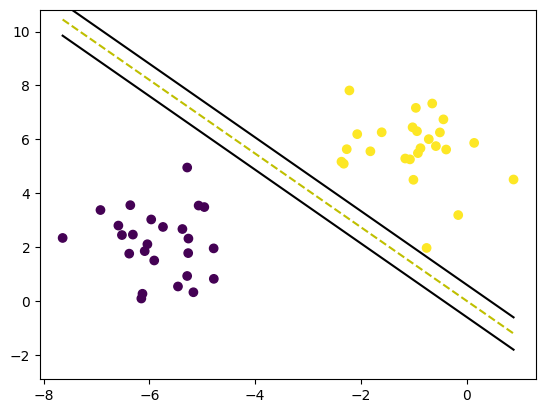

In [14]:
def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()
